In [1]:
# Procesamiento de los datos

In [2]:
%matplotlib inline

#Lectura del archivo "exoplanet.eu_catalog.csv", en donde están los datos de utilidad.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

exoplanetas=pd.read_csv("exoplanet.eu_catalog.csv", delimiter=',')
print(exoplanetas)

                      # name planet_status  mass [Mj]  mass_error_min  \
0                      Earth     Confirmed   0.003147             NaN   
1                    Jupiter     Confirmed   1.000000             NaN   
2                       Mars     Confirmed   0.000338             NaN   
3      OGLE-2016-BLG-1469L b     Confirmed  13.600000         3.00000   
4                   11 Com b     Confirmed  19.400000         1.50000   
5                   11 Oph b     Confirmed  21.000000         3.00000   
6                   11 UMi b     Confirmed  10.500000         2.47000   
7                   14 And b     Confirmed   5.330000         0.57000   
8                   14 Her b     Confirmed   4.640000         0.19000   
9                 16 Cyg B b     Confirmed   1.680000         0.07000   
10                  18 Del b     Confirmed  10.300000             NaN   
11                1I/2017 U1     Confirmed        NaN             NaN   
12               1RXS 1609 b     Confirmed  14.0000

In [3]:
# Revisar cuales son las variables que tenemos

#Nombre de variable y su tamaño.
print(exoplanetas.axes)

[RangeIndex(start=0, stop=3729, step=1), Index(['# name', 'planet_status', 'mass [Mj]', 'mass_error_min',
       'mass_error_max', 'mass_sini', 'mass_sini_error_min',
       'mass_sini_error_max', 'radius [Rj]', 'radius_error_min',
       'radius_error_max', 'orbital_period', 'orbital_period_error_min',
       'orbital_period_error_max', 'semi_major_axis [UA]',
       'semi_major_axis_error_min', 'semi_major_axis_error_max',
       'eccentricity', 'eccentricity_error_min', 'eccentricity_error_max',
       'inclination', 'inclination_error_min', 'inclination_error_max',
       'angular_distance', 'discovered', 'updated', 'omega', 'omega_error_min',
       'omega_error_max', 'tperi', 'tperi_error_min', 'tperi_error_max',
       'tconj', 'tconj_error_min', 'tconj_error_max', 'tzero_tr',
       'tzero_tr_error_min', 'tzero_tr_error_max', 'tzero_tr_sec',
       'tzero_tr_sec_error_min', 'tzero_tr_sec_error_max', 'lambda_angle',
       'lambda_angle_error_min', 'lambda_angle_error_max', 'imp

In [4]:
# Selección de las variables que se van a utilizar, descartando las que no.
datos=pd.DataFrame(exoplanetas, columns=['# name','mass [Mj]','radius [Rj]','semi_major_axis [UA]','star_name',
                                         'star_mass [Ms]','star_radius [Rs]'])
print(datos)

                      # name  mass [Mj]  radius [Rj]  semi_major_axis [UA]  \
0                      Earth   0.003147     0.089328              1.000000   
1                    Jupiter   1.000000     1.000000              5.204529   
2                       Mars   0.000338     0.047577              1.523705   
3      OGLE-2016-BLG-1469L b  13.600000          NaN              0.330000   
4                   11 Com b  19.400000          NaN              1.290000   
5                   11 Oph b  21.000000          NaN            243.000000   
6                   11 UMi b  10.500000          NaN              1.540000   
7                   14 And b   5.330000          NaN              0.830000   
8                   14 Her b   4.640000          NaN              2.770000   
9                 16 Cyg B b   1.680000          NaN              1.680000   
10                  18 Del b  10.300000          NaN              2.600000   
11                1I/2017 U1        NaN     0.000002            

In [5]:
# Quitamos los NaN.
datoslimpios=datos.dropna()
print(datoslimpios)


                # name  mass [Mj]  radius [Rj]  semi_major_axis [UA]  \
0                Earth   0.003147     0.089328              1.000000   
1              Jupiter   1.000000     1.000000              5.204529   
2                 Mars   0.000338     0.047577              1.523705   
12         1RXS 1609 b  14.000000     1.700000            330.000000   
18        2M 0219-39 b  13.900000     1.440000            156.000000   
20        2M 0746+20 b  30.000000     0.970000              2.897000   
24        2M 2140+16 b  20.000000     0.920000              3.530000   
25        2M 2206-20 b  30.000000     1.300000              4.480000   
40            51 Peg b   0.470000     1.900000              0.052000   
44            55 Cnc e   0.025470     0.177536              0.015439   
67         BD+20 594 b   0.051300     0.199000              0.241000   
77        BD-10 3166 b   0.460000     1.030000              0.046000   
87          CVSO 30 b    6.200000     1.910000              0.00

In [6]:
#Normalizamos los datos

datosnorm=preprocessing.normalize(datoslimpios.get(['mass [Mj]','radius [Rj]','semi_major_axis [UA]'
                                                    ,'star_mass [Ms]','star_radius [Rs]']))
print(pd.DataFrame(datosnorm))

            0         1         2         3         4
0    0.001814  0.051505  0.576583  0.576583  0.576583
1    0.179353  0.179353  0.933450  0.179353  0.179353
2    0.000163  0.022880  0.732759  0.480906  0.480906
3    0.042385  0.005147  0.999077  0.002210  0.004087
4    0.088747  0.009194  0.996010  0.000702  0.001724
5    0.994842  0.032167  0.096069  0.003979  0.002951
6    0.983750  0.045253  0.173632  0.003935  0.004919
7    0.988110  0.042818  0.147558  0.004282  0.003623
8    0.182006  0.735768  0.020137  0.429843  0.490254
9    0.019305  0.134564  0.011702  0.685945  0.714747
10   0.037365  0.144942  0.175533  0.699948  0.675912
11   0.202135  0.452608  0.020214  0.435031  0.751417
12   0.932860  0.287381  0.001261  0.058680  0.209141
13   0.442576  0.640232  0.010914  0.408201  0.476951
14   0.872654  0.307809  0.033478  0.282423  0.250690
15   0.704503  0.432378  0.013156  0.384000  0.411212
16   0.397434  0.624106  0.017406  0.467212  0.483682
17   0.603022  0.408008  0.0

# Cluster dandole peso a la zona habitable, principalmente queremos que esté e una estrella similar al Sol y a una distancia cercana a a 1 UA con una masa y radio dentro del rango de un planeta subterrano a una super Tierra.

In [7]:
#Le daremos más importancia a los parámetros dentro de una zona habitable, esto es darle mayor peso a la distancia
#a la estrella, su masa y su radio.
datosnorm2=datosnorm
for i in range(len(datosnorm2)):
    datosnorm2[i][0]=datosnorm[i][0]*9 #Masa del planeta
    datosnorm2[i][1]=datosnorm[i][1]*9 #Radio del planeta
    datosnorm2[i][2]=datosnorm[i][2]*10 #Semieje mayor 
    datosnorm2[i][3]=datosnorm[i][3]*12 #Masa de la estrella
    datosnorm2[i][4]=datosnorm[i][4]*12 #Radio de la estrella
print(pd.DataFrame(datosnorm2))

            0         1         2         3         4
0    0.016330  0.463544  5.765830  6.918996  6.918996
1    1.614181  1.614181  9.334502  2.152241  2.152241
2    0.001463  0.205921  7.327588  5.770871  5.770871
3    0.381466  0.046321  9.990773  0.026521  0.049046
4    0.798723  0.082745  9.960100  0.008428  0.020686
5    8.953582  0.289499  0.960686  0.047752  0.035416
6    8.853752  0.407273  1.736319  0.047220  0.059025
7    8.892992  0.385363  1.475578  0.051382  0.043477
8    1.638052  6.621911  0.201368  5.158120  5.883045
9    0.173745  1.211072  0.117020  8.231336  8.576961
10   0.336281  1.304481  1.755332  8.399372  8.110944
11   1.819219  4.073470  0.202135  5.220369  9.017001
12   8.395737  2.586429  0.012609  0.704159  2.509694
13   3.983186  5.762084  0.109140  4.898416  5.723413
14   7.853886  2.770280  0.334782  3.389071  3.008276
15   6.340531  3.891399  0.131558  4.607997  4.934548
16   3.576905  5.616950  0.174056  5.606549  5.804182
17   5.427196  3.672071  0.2

In [8]:
# Hacemos el PCA para obtener 2 componentes principales.
X3 = PCA(n_components=2).fit_transform(datosnorm2)
print(X3)

[[-3.1063197   5.60634445]
 [ 2.76759468  7.49050144]
 [-1.96595905  6.94376902]
 ..., 
 [ 1.45335657 -1.60640016]
 [ 4.85097471  9.10560692]
 [ 7.2407513   1.11229863]]


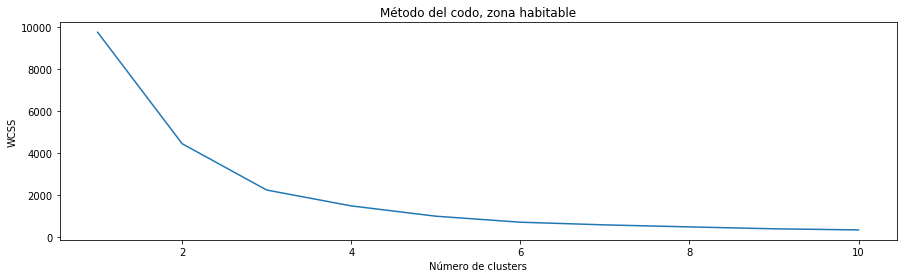

In [9]:
#“Within cluster sum of squares by cluster”
wcss3 = []
#i es el número de veces que queremos hacer el clustering.
#The elbow method se usa para ver si el problema converge y saber el número de clusterings necesarios.
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Características
    kmeans3.fit(X3) #Le pasamos los datos 
    wcss3.append(kmeans3.inertia_)
fig=plt.figure(figsize=(15,4))
plt.plot(range(1, 11), wcss3)
plt.title('Método del codo, zona habitable')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png',dpi=400) 
plt.show()

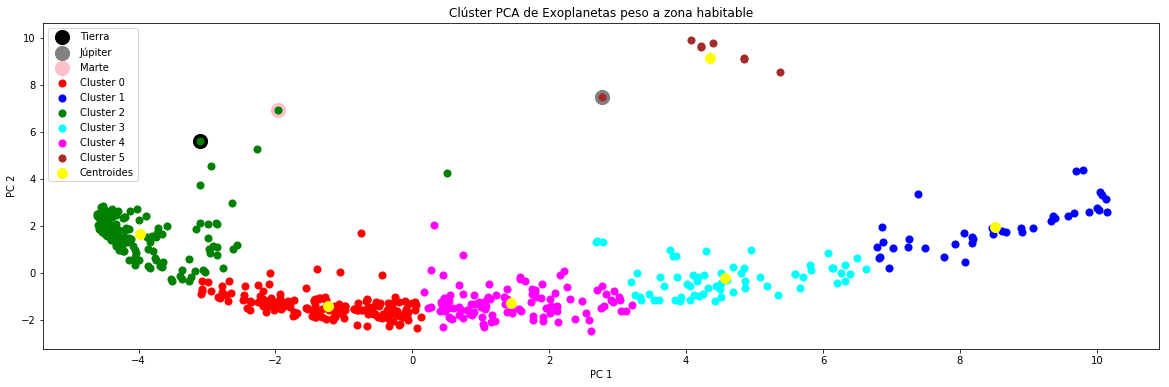

In [10]:
#Realizamos el Clustering para 6 clústers.
kmeans3 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42) 
y_kmeans3 = kmeans3.fit_predict(X3)

# Graficamos los clústers
fig=plt.figure(figsize=(20,6))
plt.scatter(X3[0,0], X3[0,1], s = 200, c = 'black', label = 'Tierra')
plt.scatter(X3[1,0], X3[1,1], s = 200, c = 'gray', label = 'Júpiter')
plt.scatter(X3[2,0], X3[2,1], s = 200, c = 'pink', label = 'Marte')
plt.scatter(X3[y_kmeans3 == 0, 0], X3[y_kmeans3 == 0, 1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(X3[y_kmeans3 == 1, 0], X3[y_kmeans3 == 1, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X3[y_kmeans3 == 2, 0], X3[y_kmeans3 == 2, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X3[y_kmeans3 == 3, 0], X3[y_kmeans3 == 3, 1], s = 50, c = 'cyan', label = 'Cluster 3')
plt.scatter(X3[y_kmeans3 == 4, 0], X3[y_kmeans3 == 4, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(X3[y_kmeans3 == 5, 0], X3[y_kmeans3 == 5, 1], s = 50, c = 'brown', label = 'Cluster 5')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroides')
plt.title('Clúster PCA de Exoplanetas peso a zona habitable')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig('clusterzh.png',dpi=400) 
plt.show() 

In [11]:
#Agregamos el cluster al que pertenece cada dato a nuestro DataFrame de datos limpios.
datoslimpios['cluster']=y_kmeans3
print(datoslimpios)

                # name  mass [Mj]  radius [Rj]  semi_major_axis [UA]  \
0                Earth   0.003147     0.089328              1.000000   
1              Jupiter   1.000000     1.000000              5.204529   
2                 Mars   0.000338     0.047577              1.523705   
12         1RXS 1609 b  14.000000     1.700000            330.000000   
18        2M 0219-39 b  13.900000     1.440000            156.000000   
20        2M 0746+20 b  30.000000     0.970000              2.897000   
24        2M 2140+16 b  20.000000     0.920000              3.530000   
25        2M 2206-20 b  30.000000     1.300000              4.480000   
40            51 Peg b   0.470000     1.900000              0.052000   
44            55 Cnc e   0.025470     0.177536              0.015439   
67         BD+20 594 b   0.051300     0.199000              0.241000   
77        BD-10 3166 b   0.460000     1.030000              0.046000   
87          CVSO 30 b    6.200000     1.910000              0.00

/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#Obtenemos los planetas que pertenecen al cluster 2, que es donde está la Tierra.
planetasmatriz3=datoslimpios.as_matrix()
planetasTierra3=[]
for i in planetasmatriz3:
    if i[7]==2:
        planetasTierra3.append(i)
print(pd.DataFrame(planetasTierra3,columns=['# name','mass [Mj]','radius [Rj]','semi_major_axis [UA]','star_name'
                                            ,'star_mass [Ms]','star_radius [Rs]','cluster']))

               # name  mass [Mj]  radius [Rj]  semi_major_axis [UA]  \
0               Earth   0.003147     0.089328              1.000000   
1                Mars   0.000338     0.047577              1.523705   
2            55 Cnc e   0.025470     0.177536              0.015439   
3         BD+20 594 b   0.051300     0.199000              0.241000   
4          CoRoT-22 b   0.038385     0.435365              0.092000   
5          CoRoT-24 b   0.018000     0.330000              0.056000   
6          CoRoT-24 c   0.088000     0.440000              0.098000   
7          CoRoT-32 b   0.150000     0.570000              0.071000   
8           CoRoT-7 b   0.014900     0.136000              0.017200   
9    EPIC 210894022 b   0.027000     0.170000              0.062100   
10   EPIC 211391664 b   0.101000     0.380000              0.094300   
11   EPIC 228754001 b   0.495000     1.089000              0.091600   
12          GJ 1132 b   0.005100     0.103000              0.015400   
13    

In [13]:
# Guardar la tabla
tabla= pd.DataFrame(planetasTierra3,columns=['# name','mass [Mj]','radius [Rj]','semi_major_axis [UA]','star_name'
                                            ,'star_mass [Ms]','star_radius [Rs]','cluster'])
tabla.to_html('tabl3.html')

0.9999999997936089
24.030523993
2579.70058645
50.790752962


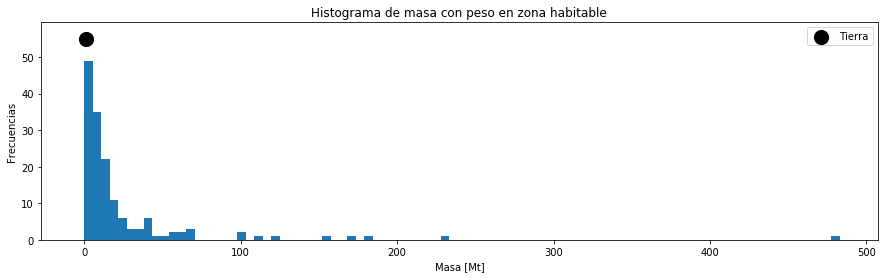

In [14]:
#Calculamos el histograma y medidas de tendencia central de la masa de la lista obtenida arriba.
masa1=[]
for i in planetasTierra3:
    masa1.append(i[1]*317.7710843)
print(masa1[0])
print(np.mean(masa1))
print(np.var(masa1))
print(np.std(masa1))

fig=plt.figure(figsize=(15,4))
plt.hist(masa1, bins='auto')  # arguments are passed to np.histogram
plt.scatter(masa1[0],55,color='black',label='Tierra',s=200)
plt.title('Histograma de masa con peso en zona habitable')
plt.xlabel('Masa [Mt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramamasa.png',dpi=400) 
plt.show()

0.9999999988870415
3.41079744091
7.84998540466
2.80178254057


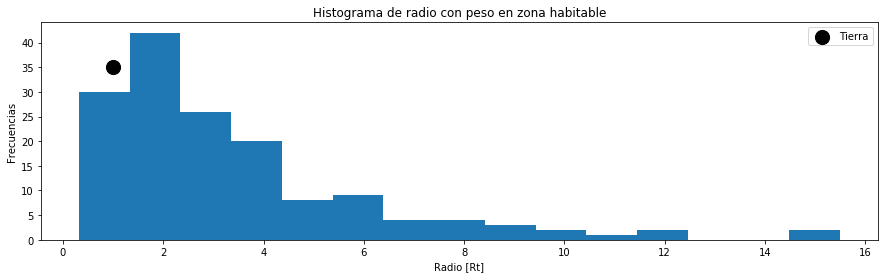

In [15]:
#Calculamos el histograma y medidas de tendencia central de la masa de la lista obtenida arriba.
radio1=[]
for i in planetasTierra3:
    radio1.append(i[2]*11.19473189)
print(radio1[0])
print(np.mean(radio1))
print(np.var(radio1))
print(np.std(radio1))

fig=plt.figure(figsize=(15,4))
plt.hist(radio1, bins='auto')  # arguments are passed to np.histogram
plt.scatter(radio1[0],35,color='black',label='Tierra',s=200)
plt.title('Histograma de radio con peso en zona habitable')
plt.xlabel('Radio [Rt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramaradio.png',dpi=400) 
plt.show()

1.00000000091
5.90971507863
48.2812706809
6.948472543


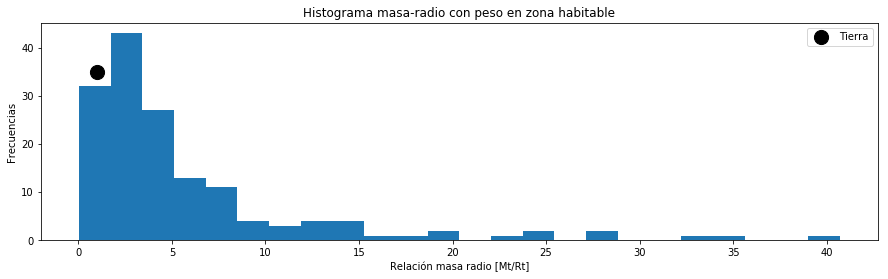

In [16]:
#Calculamos el histograma y medidas de tendencia central de la relación masa radio de la lista obtenida arriba.
relmasrad1=np.array(masa1)/np.array(radio1)
print(relmasrad1[0])
print(np.mean(relmasrad1))
print(np.var(relmasrad1))
print(np.std(relmasrad1))

fig=plt.figure(figsize=(15,4))
plt.hist(relmasrad1, bins='auto')  # arguments are passed to np.histogram
plt.scatter(relmasrad1[0],35,color='black',label='Tierra',s=200)
plt.title('Histograma masa-radio con peso en zona habitable')
plt.xlabel('Relación masa radio [Mt/Rt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramazhmr.png',dpi=400) 
plt.show()

1.0
0.17566543268
0.0860110248217
0.293276362535


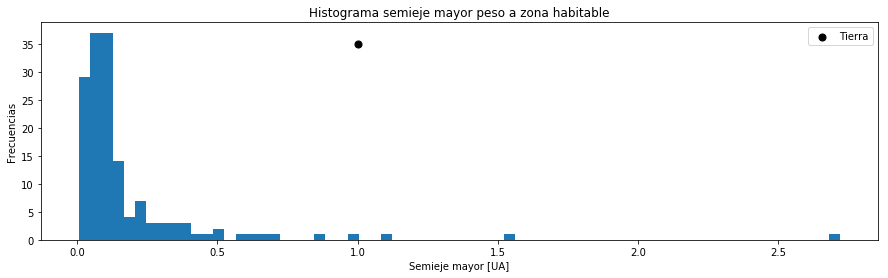

In [17]:
#Calculamos el histograma y medidas de tendencia central del semieje mayor.
semaxis=[]
for i in planetasTierra3:
    semaxis.append(i[3])
print(planetasTierra3[0][3])
print(np.mean(semaxis))
print(np.var(semaxis))
print(np.std(semaxis))

fig=plt.figure(figsize=(15,4))
plt.hist(semaxis, bins='auto')  # arguments are passed to np.histogram
plt.scatter(planetasTierra3[0][3],35,color='black',label='Tierra',s=50)
plt.title('Histograma semieje mayor peso a zona habitable')
plt.xlabel('Semieje mayor [UA]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramazhse.png',dpi=400) 
plt.show()

1.0
0.962709595855
0.0786578037931
0.280459986082


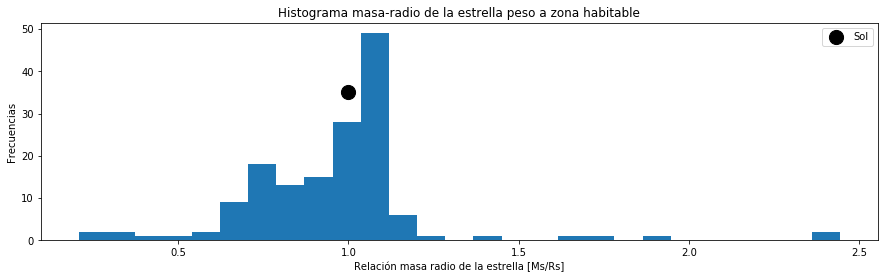

In [18]:
#Calculamos el histograma y medidas de tendencia central de la relación masa radio para la estrella.
relmasrad11=[]
for i in planetasTierra3:
    relmasrad11.append(i[5]/i[6])
print(planetasTierra3[0][5]/planetasTierra3[0][6])
print(np.mean(relmasrad11))
print(np.var(relmasrad11))
print(np.std(relmasrad11))

fig=plt.figure(figsize=(15,4))
plt.hist(relmasrad11, bins='auto')  # arguments are passed to np.histogram
plt.scatter(planetasTierra3[0][5]/planetasTierra3[0][6],35,color='black',label='Sol',s=200)
plt.title('Histograma masa-radio de la estrella peso a zona habitable')
plt.xlabel('Relación masa radio de la estrella [Ms/Rs]') #Ms=radio del Sol, Rs= radio del Sol
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramazhmre.png',dpi=400) 
plt.show()

# Utilizando masa, radio y la temperatura calculada.

In [19]:
# Selección de las variables que se van a utilizar, descartando las que no.
datos1=pd.DataFrame(exoplanetas, columns=['# name','mass [Mj]','radius [Rj]','temp_calculated [K]'])
# Quitamos los NaN.
datoslimpios1=datos1.dropna()
print(datoslimpios1)

                # name  mass [Mj]  radius [Rj]  temp_calculated [K]
0                Earth   0.003147     0.089328                287.0
1              Jupiter   1.000000     1.000000                152.0
2                 Mars   0.000338     0.047577                227.0
39            51 Eri b   9.100000     1.110000                700.0
67         BD+20 594 b   0.051300     0.199000                386.0
94          CoRoT-15 b  63.400000     1.120000               1740.0
102         CoRoT-22 b   0.038385     0.435365                885.0
104         CoRoT-24 b   0.018000     0.330000               1070.0
105         CoRoT-24 c   0.088000     0.440000                850.0
108         CoRoT-27 b  10.390000     1.007000               1500.0
114         CoRoT-32 b   0.150000     0.570000                938.0
141   EPIC 210894022 b   0.027000     0.170000               1309.0
155   EPIC 216468514 b   0.840000     1.440000               1780.0
156   EPIC 219388192 b  36.500000     0.937000  

In [20]:
#Normalizamos los datos

datosnorm1_1=preprocessing.normalize(datoslimpios1.get(['mass [Mj]','radius [Rj]','temp_calculated [K]']))
print(pd.DataFrame(datosnorm1_1))

            0         1         2
0    0.000011  0.000311  1.000000
1    0.006579  0.006579  0.999957
2    0.000001  0.000210  1.000000
3    0.012999  0.001586  0.999914
4    0.000133  0.000516  1.000000
5    0.036413  0.000643  0.999337
6    0.000043  0.000492  1.000000
7    0.000017  0.000308  1.000000
8    0.000104  0.000518  1.000000
9    0.006926  0.000671  0.999976
10   0.000160  0.000608  1.000000
11   0.000021  0.000130  1.000000
12   0.000472  0.000809  1.000000
13   0.031342  0.000805  0.999508
14   0.001280  0.000910  0.999999
15   0.000915  0.000983  0.999999
16   0.000312  0.000687  1.000000
17   0.000008  0.000067  1.000000
18   0.000009  0.000178  1.000000
19   0.052397  0.001054  0.998626
20   0.000025  0.000140  1.000000
21   0.000011  0.000159  1.000000
22   0.000020  0.000307  1.000000
23   0.000397  0.000998  0.999999
24   0.000110  0.000563  1.000000
25   0.000218  0.001126  0.999999
26   0.000683  0.000895  0.999999
27   0.000485  0.000943  0.999999
28   0.000812 

In [21]:
#Le damos más peso al radio, en la normalización de la temperatura la mayoría de los datos queda bastante grande compara-
#ndo con la masa y el radio, aun así es la variable a la que más peso se le deb dar y si nos fijamos en la lista
#de abajo, podemos ver que la varaible 2 correspondiente a la temperatura, es la más pesada. 
datosnorm1_12=datosnorm1_1
for i in range(len(datosnorm1_12)):
    datosnorm1_12[i][0]=datosnorm1_1[i][0]*10 #Masa del planeta
    datosnorm1_12[i][1]=datosnorm1_1[i][1]*50 #Radio del planeta
    datosnorm1_12[i][2]=datosnorm1_1[i][2]*20 #Temperatura calculada
print(pd.DataFrame(datosnorm1_12))

            0         1          2
0    0.000110  0.015562  19.999999
1    0.065787  0.328933  19.999134
2    0.000015  0.010480  20.000000
3    0.129989  0.079279  19.998285
4    0.001329  0.025777  19.999997
5    0.364126  0.032163  19.986733
6    0.000434  0.024597  19.999998
7    0.000168  0.015421  19.999999
8    0.001035  0.025882  19.999997
9    0.069265  0.033566  19.999516
10   0.001599  0.030384  19.999996
11   0.000206  0.006494  20.000000
12   0.004719  0.040449  19.999991
13   0.313420  0.040229  19.990168
14   0.012800  0.045500  19.999975
15   0.009147  0.049147  19.999982
16   0.003121  0.034332  19.999994
17   0.000082  0.003359  20.000000
18   0.000088  0.008879  20.000000
19   0.523970  0.052705  19.972516
20   0.000247  0.006996  20.000000
21   0.000109  0.007965  20.000000
22   0.000198  0.015374  19.999999
23   0.003971  0.049887  19.999988
24   0.001099  0.028132  19.999997
25   0.002176  0.056302  19.999987
26   0.006833  0.044744  19.999987
27   0.004849  0.047

In [22]:
# Hacemos el PCA

X1 = PCA(n_components=2).fit_transform(datosnorm1_12)
print(X1)

[[ -2.25584343e-02  -1.99761644e-02]
 [  1.28924162e-01   2.62102653e-01]
 [ -2.40846401e-02  -2.48252607e-02]
 [  1.19997808e-01   4.50042459e-03]
 [ -1.85048900e-02  -1.05210585e-02]
 [  3.31560723e-01  -1.06907890e-01]
 [ -1.96964120e-02  -1.14008879e-02]
 [ -2.25423183e-02  -2.01286663e-02]
 [ -1.87567527e-02  -1.03373838e-02]
 [  4.88344136e-02  -2.22103339e-02]
 [ -1.69450343e-02  -6.17823497e-03]
 [ -2.50268266e-02  -2.87028956e-02]
 [ -1.11116662e-02   2.59784446e-03]
 [  2.85105016e-01  -8.48141159e-02]
 [ -1.93867947e-03   5.16428137e-03]
 [ -4.41044218e-03   9.69287966e-03]
 [ -1.43712497e-02  -2.82023239e-03]
 [ -2.60310680e-02  -3.16742244e-02]
 [ -2.44665170e-02  -2.63808909e-02]
 [  4.91113489e-01  -1.32514926e-01]
 [ -2.48457297e-02  -2.82327184e-02]
 [ -2.47040770e-02  -2.72639403e-02]
 [ -2.25264356e-02  -2.01814082e-02]
 [ -9.16345842e-03   1.18614077e-02]
 [ -1.80602080e-02  -8.19715453e-03]
 [ -9.07261801e-03   1.85217179e-02]
 [ -7.87283417e-03   6.12184457e-03]
 

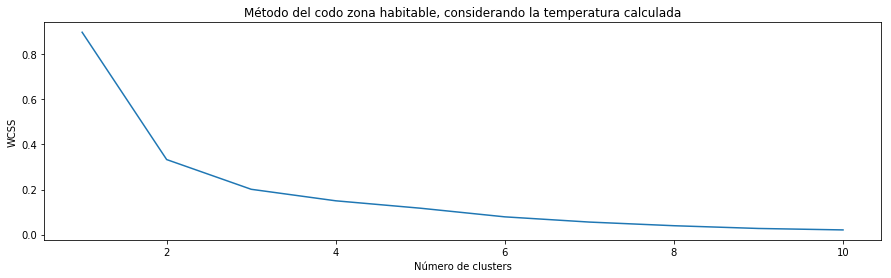

In [23]:
#“Within cluster sum of squares by cluster”
wcss1 = []
#i es el numero de veces que queremos hacer el clustering.
#The elbow method se usa para ver si el problema converge y saber el número de clusterings necesarios para 
#obtener resultados buenos.
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Características
    kmeans1.fit(X1) #Le pasamos los datos 
    wcss1.append(kmeans1.inertia_)
fig=plt.figure(figsize=(15,4))
plt.plot(range(1, 11), wcss1)
plt.title('Método del codo zona habitable, considerando la temperatura calculada')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.savefig('elbow1.png',dpi=400) 
plt.show()

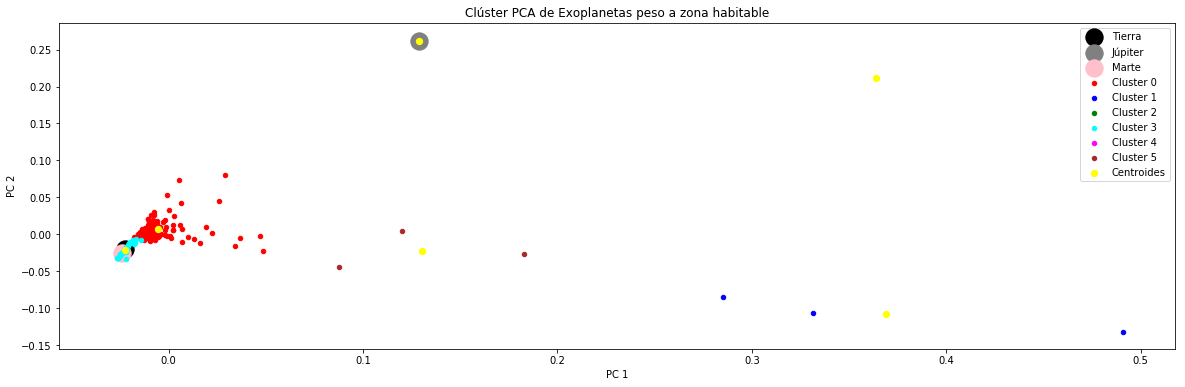

In [24]:
#Realizamos el Clustering, con 6 son suficientes, después de 6 ya se agregan nuevos grupos de menos de 5 planetas.
kmeans1 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42) 
y_kmeans1 = kmeans1.fit_predict(X1)

# Graficamos los clusters
fig=plt.figure(figsize=(20,6))
plt.scatter(X1[0,0], X1[0,1], s = 300, c = 'black', label = 'Tierra')
plt.scatter(X1[1,0], X1[1,1], s = 300, c = 'gray', label = 'Júpiter')
plt.scatter(X1[2,0], X1[2,1], s = 300, c = 'pink', label = 'Marte')
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 20, c = 'cyan', label = 'Cluster 3')
plt.scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s = 20, c = 'magenta', label = 'Cluster 4')
plt.scatter(X1[y_kmeans1 == 5, 0], X1[y_kmeans1 == 5, 1], s = 20, c = 'brown', label = 'Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 40, c = 'yellow', label = 'Centroides')
plt.title('Clúster PCA de Exoplanetas peso a zona habitable')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig('clusterzh1.png',dpi=400) 
plt.show() 

In [25]:
#Agregamos a datoslimpios la columna con el cluster correspondiente de cada dato.
datoslimpios1['cluster']=y_kmeans1
print(datoslimpios1)

                # name  mass [Mj]  radius [Rj]  temp_calculated [K]  cluster
0                Earth   0.003147     0.089328                287.0        3
1              Jupiter   1.000000     1.000000                152.0        4
2                 Mars   0.000338     0.047577                227.0        3
39            51 Eri b   9.100000     1.110000                700.0        5
67         BD+20 594 b   0.051300     0.199000                386.0        3
94          CoRoT-15 b  63.400000     1.120000               1740.0        1
102         CoRoT-22 b   0.038385     0.435365                885.0        3
104         CoRoT-24 b   0.018000     0.330000               1070.0        3
105         CoRoT-24 c   0.088000     0.440000                850.0        3
108         CoRoT-27 b  10.390000     1.007000               1500.0        0
114         CoRoT-32 b   0.150000     0.570000                938.0        3
141   EPIC 210894022 b   0.027000     0.170000               1309.0        3

/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#Obtenemos los planetas que pertenecen al cluster 3, que es donde está la Tierra.
planetasmatriz1=datoslimpios1.as_matrix()
planetasTierra1=[]
for i in planetasmatriz1:
    if i[4]==3:
        planetasTierra1.append(i)
print(pd.DataFrame(planetasTierra1,columns=['# name','mass [Mj]','radius [Rj]','temp_calculated [K]','cluster']))

# Guardar la tabla
tabla= pd.DataFrame(planetasTierra1,columns=['# name','mass [Mj]','radius [Rj]','temp_calculated [K]','cluster'])
tabla.to_html('tabl3_1.html')

              # name  mass [Mj]  radius [Rj]  temp_calculated [K]  cluster
0              Earth   0.003147     0.089328                287.0        3
1               Mars   0.000338     0.047577                227.0        3
2        BD+20 594 b   0.051300     0.199000                386.0        3
3         CoRoT-22 b   0.038385     0.435365                885.0        3
4         CoRoT-24 b   0.018000     0.330000               1070.0        3
5         CoRoT-24 c   0.088000     0.440000                850.0        3
6         CoRoT-32 b   0.150000     0.570000                938.0        3
7   EPIC 210894022 b   0.027000     0.170000               1309.0        3
8   EPIC 246393474 b   0.016700     0.137000               2039.0        3
9          GJ 1132 b   0.005100     0.103000                580.0        3
10         GJ 9827 b   0.025800     0.146000               1043.5        3
11         GJ 9827 c   0.007900     0.115000                721.9        3
12         GJ 9827 d   0.

0.9999999997936089
23.2604274633
2749.10928961
52.4319491304


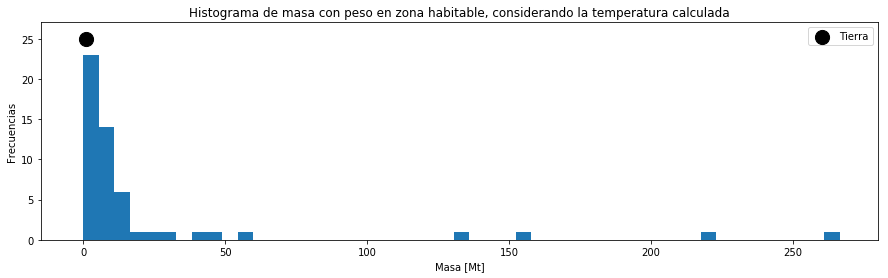

In [27]:
#Calculamos el histograma y medidas de tendencia central de la masa de la lista obtenida arriba.
masa11=[]
for i in planetasTierra1:
    masa11.append(i[1]*317.7710843)
print(masa11[0])
print(np.mean(masa11))
print(np.var(masa11))
print(np.std(masa11))

fig=plt.figure(figsize=(15,4))
plt.hist(masa11, bins='auto')  # arguments are passed to np.histogram
plt.scatter(masa11[0],25,color='black',label='Tierra',s=200)
plt.title('Histograma de masa con peso en zona habitable, considerando la temperatura calculada')
plt.xlabel('Masa [Mt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramamasa1.png',dpi=400) 
plt.show()

0.9999999988870415
2.56432961129
5.00537424326
2.23726937208


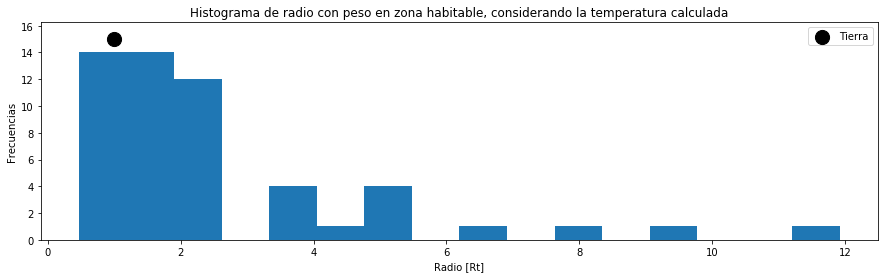

In [28]:
#Calculamos el histograma y medidas de tendencia central del radio de la lista obtenida arriba.
radio11=[]
for i in planetasTierra1:
    radio11.append(i[2]*11.19473189)
print(radio11[0])
print(np.mean(radio11))
print(np.var(radio11))
print(np.std(radio11))

fig=plt.figure(figsize=(15,4))
plt.hist(radio11, bins='auto')  # arguments are passed to np.histogram
plt.scatter(radio11[0],15,color='black',label='Tierra',s=200)
plt.title('Histograma de radio con peso en zona habitable, considerando la temperatura calculada')
plt.xlabel('Radio [Rt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramaradio1.png',dpi=400) 
plt.show()

1.00000000091
9.19977508462
1155.75488301
33.9963951473


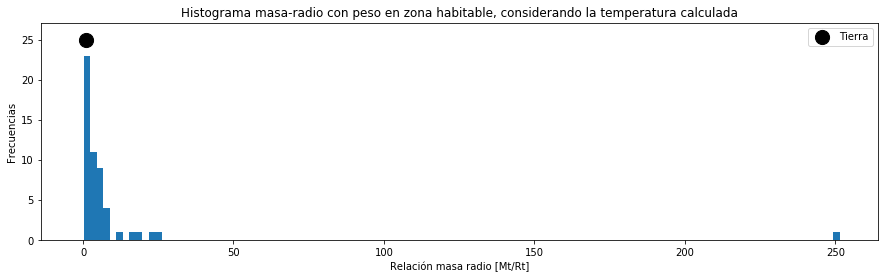

In [29]:
#Calculamos el histograma y medidas de tendencia central de la relación masa radio de la lista obtenida arriba.
relmasrad11=np.array(masa11)/np.array(radio11)
print(relmasrad11[0])
print(np.mean(relmasrad11))
print(np.var(relmasrad11))
print(np.std(relmasrad11))

fig=plt.figure(figsize=(15,4))
plt.hist(relmasrad11, bins='auto')  # arguments are passed to np.histogram
plt.scatter(relmasrad11[0],25,color='black',label='Tierra',s=200)
plt.title('Histograma masa-radio con peso en zona habitable, considerando la temperatura calculada')
plt.xlabel('Relación masa radio [Mt/Rt]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramazhmr1.png',dpi=400) 
plt.show()

287.0
878.683018868
327406.966315
572.194867432


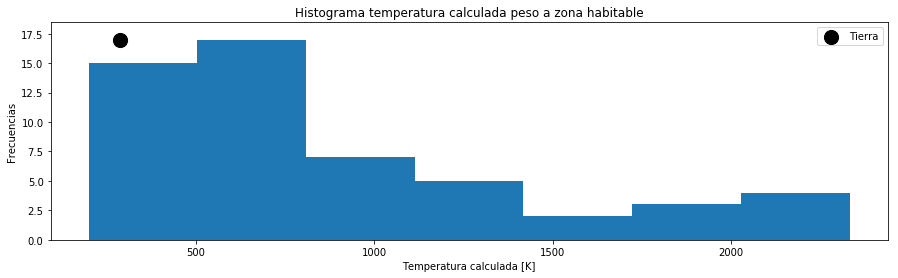

In [30]:
#Calculamos el histograma y medidas de tendencia central del semieje mayor.
temp=[]
for i in planetasTierra1:
    temp.append(i[3])
print(temp[0])
print(np.mean(temp))
print(np.var(temp))
print(np.std(temp))

fig=plt.figure(figsize=(15,4))
plt.hist(temp, bins='auto')  # arguments are passed to np.histogram
plt.scatter(temp[0],17,color='black',label='Tierra',s=200)
plt.title('Histograma temperatura calculada peso a zona habitable')
plt.xlabel('Temperatura calculada [K]')
plt.ylabel('Frecuencias')
plt.legend()
plt.savefig('histogramatemp.png',dpi=400) 
plt.show()

In [31]:
#Como hay mucha dispersión en la temperatura calculada, apliqué un filtro de -100°C a 100°C.
planetasTierra11=[]
for i in planetasmatriz1:
    if 173<i[3]<373:
        planetasTierra11.append(i)
print(pd.DataFrame(planetasTierra11,columns=['# name','mass [Mj]','radius [Rj]','temp_calculated [K]','cluster']))

# Guardar la tabla
tabla= pd.DataFrame(planetasTierra11,columns=['# name','mass [Mj]','radius [Rj]','temp_calculated [K]','cluster'])
tabla.to_html('tabl3_1filtemp.html')

         # name  mass [Mj]  radius [Rj]  temp_calculated [K]  cluster
0         Earth   0.003147     0.089328                287.0        3
1          Mars   0.000338     0.047577                227.0        3
2        K2-3 c   0.006600     0.165000                344.0        3
3        K2-3 d   0.034900     0.135000                282.0        3
4    LHS 1140 b   0.020900     0.128000                230.0        3
5  TRAPPIST-1 c   0.004340     0.094210                341.9        3
6  TRAPPIST-1 d   0.001300     0.068900                288.0        3
7  TRAPPIST-1 e   0.002000     0.081900                251.3        3
8  TRAPPIST-1 f   0.002100     0.093230                219.0        3
9  TRAPPIST-1 g   0.004220     0.100500                198.6        3


# Comparación con otra tabla que contiene los datos de los planetas que ya han sido clasificados como habitables.

In [32]:
#Lectura del .csv
classhabitables=pd.read_csv("phl_hec_all_confirmed.csv", delimiter=',')
print(classhabitables)

                   P. Name P. Name Kepler  P. Name KOI P. Zone Class  \
0              1RXS 1609 b            NaN          NaN          Cold   
1           1SWASP J1407 b            NaN          NaN          Cold   
2         2M 0103-55(AB) b            NaN          NaN          Cold   
3             2M 0122-24 b            NaN          NaN          Cold   
4             2M 0219-39 b            NaN          NaN          Cold   
5             2M 0441+23 b            NaN          NaN          Cold   
6             2M 0746+20 b            NaN          NaN          Cold   
7             2M 1207-39 b            NaN          NaN          Cold   
8             2M 1938+46 b            NaN          NaN          Cold   
9             2M 2140+16 b            NaN          NaN          Cold   
10            2M 2206-20 b            NaN          NaN          Cold   
11          2M 2236+4751 b            NaN          NaN          Cold   
12    2MASS J11193254 AB b            NaN          NaN          

In [33]:
#Vemos que variables tenemos.
print(classhabitables.axes)

[RangeIndex(start=0, stop=3782, step=1), Index(['P. Name', 'P. Name Kepler', 'P. Name KOI', 'P. Zone Class',
       'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class',
       'P. Habitable Class', 'P. Min Mass (EU)', 'P. Mass (EU)',
       'P. Max Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)',
       'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)',
       'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)',
       'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Ts Min (K)', 'P. Ts Mean (K)',
       'P. Ts Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)',
       'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity',
       'P. Mean Distance (AU)', 'P. Inclination (deg)', 'P. Omega (deg)',
       'S. Name', 'S. Name HD', 'S. Name HIP', 'S. Constellation', 'S. Type',
       'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)',
       'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)',
       'S. RA (hrs)', 'S

In [34]:
#Eliminamos todos los planetas que tengan la etiqueta de no habitables.
classhabitablesmatriz=classhabitables.as_matrix()
habitable=[]
for i in classhabitablesmatriz:
    if i[7]!='non-habitable':
        habitable.append(i)
print(pd.DataFrame(habitable,columns=['P. Name', 'P. Name Kepler', 'P. Name KOI', 'P. Zone Class',
       'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class',
       'P. Habitable Class', 'P. Min Mass (EU)', 'P. Mass (EU)',
       'P. Max Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)',
       'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Min (EU)',
       'P. SFlux Mean (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)',
       'P. Teq Mean (K)', 'P. Teq Max (K)', 'P. Ts Min (K)', 'P. Ts Mean (K)',
       'P. Ts Max (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)',
       'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity',
       'P. Mean Distance (AU)', 'P. Inclination (deg)', 'P. Omega (deg)',
       'S. Name', 'S. Name HD', 'S. Name HIP', 'S. Constellation', 'S. Type',
       'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)',
       'S. [Fe/H]', 'S. Age (Gyrs)', 'S. Appar Mag', 'S. Distance (pc)',
       'S. RA (hrs)', 'S. DEC (deg)', 'S. Mag from Planet',
       'S. Size from Planet (deg)', 'S. No. Planets', 'S. No. Planets HZ',
       'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC',
       'P. HZA', 'P. HZI', 'P. SPH', 'P. Int ESI', 'P. Surf ESI', 'P. ESI',
       'S. HabCat', 'P. Habitable', 'P. Hab Moon', 'P. Confirmed',
       'P. Disc. Method', 'P. Disc. Year', 'Unnamed: 68']))

          P. Name P. Name Kepler  P. Name KOI P. Zone Class P. Mass Class  \
0        GJ 163 c            NaN          NaN          Warm   Superterran   
1        GJ 180 b            NaN          NaN          Warm   Superterran   
2        GJ 180 c            NaN          NaN          Warm   Superterran   
3        GJ 273 b            NaN          NaN          Warm        Terran   
4        GJ 422 b            NaN          NaN          Warm   Superterran   
5      GJ 667 C c            NaN          NaN          Warm        Terran   
6      GJ 667 C e            NaN          NaN          Warm        Terran   
7      GJ 667 C f            NaN          NaN          Warm        Terran   
8        GJ 682 c            NaN          NaN          Warm   Superterran   
9        GJ 832 c            NaN          NaN          Warm   Superterran   
10      GJ 3293 d            NaN          NaN          Warm   Superterran   
11      GJ 3323 b            NaN          NaN          Warm        Terran   

# Comparación: El objetivo de esta sección es comparar los datos obtenidos con clústers con los datos de la tabla donde ya están clasificados los planetas

In [35]:
#Creamos listas donde estarán los nombres de las variables almacenadas.
nombres1=[] #Nombres del primer clustering, el de peso a zona habitable
nombres2=[] #Peso a zona habitable considerando la temperatura
nombres3=[] #Tabla ya clasificada por no habitables y habitables
sinprocesar=[] #Datos sin procesar del primer archivo .csv
limpios=[] #Datos limpios del primer archivo .csv, en este se eligieron las variables del primer clustering
limpios1=[] #Datos limpios del primer archivo .csv, en este se eligieron las variables del segundo clustering

#COnversión de DataFrame a arrays
exoplanetasmatriz=exoplanetas.as_matrix() 
datoslimpiosmatriz=datoslimpios.as_matrix()
datoslimpiosmatriz1=datoslimpios1.as_matrix()

#Llenamos las listas mencionadas anteriormente con solo los nombres de los planetas.
for i in datoslimpiosmatriz:
    limpios.append(i[0])

for i in datoslimpiosmatriz1:
    limpios1.append(i[0])
    
for i in exoplanetasmatriz:
    sinprocesar.append(i[0])

contador=0

for i in planetasTierra3:
    if contador>1:
        nombres1.append(i[0])
    contador+=1

contador1=0
for i in planetasTierra1:
    if contador1>1:
        nombres2.append(i[0])
    contador1+=1

for i in habitable:
    nombres3.append(i[0])

#Función que compara y nos dice el porcentaje de la variable x2 que está contenido en x1
def comparar(x1,x2):
    contadorcompara=0
    for i in x1:
        for j in x2:
            if i==j:
                contadorcompara+=1
    return 100*contadorcompara/len(x2)

print('Comparación de las listas obtenidas del clustering con los datos, sin tomar en cuenta que nombres3 no se limpio ')
print('Caso 3 y caso 1: ',comparar(nombres1,nombres3), '%')
print('Caso 3 y caso 2: ',comparar(nombres2,nombres3), '%')
print('Solo el 16.98% de nombres3 esta en nombres1 y el 9.43% de nombres3 está en nombres2, malas noticias ' )
print('-----------------------------------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------')
#Sin procesar
print('Vemos que tanto influye que el archivo .csv con el que se hizo el cluster es distinto con el que se comparó')
print('Sin procesar y caso 3: ',comparar(sinprocesar,nombres3), '%')
print('El 92.45% del archivo con el que se comparo está en el primer .csv.')
print('-----------------------------------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------------------------------')
#Datos limpios
print('Por último suponemos que al limpiar los datos, se pierden bastantes de estos')
print('Datos limpios 0 y caso 3: ',comparar(limpios,nombres3), '%')
print('Datos limpios 1 y caso 3 : ',comparar(limpios1,nombres3), '%')
print('Esa era la razón de los bajos porcentajes')
print('Solo el 16.98% de nombres3 esta en limpios y el 9.43% de nombres3 está limpios1, igual que después del cluster')

Comparación de las listas obtenidas del clustering con los datos, sin tomar en cuenta que nombres3 no se limpio 
Caso 3 y caso 1:  16.9811320754717 %
Caso 3 y caso 2:  9.433962264150944 %
Solo el 16.98% de nombres3 esta en nombres1 y el 9.43% de nombres3 está en nombres2, malas noticias 
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
Vemos que tanto influye que el archivo .csv con el que se hizo el cluster es distinto con el que se comparó
Sin procesar y caso 3:  92.45283018867924 %
El 92.45% del archivo con el que se comparo está en el primer .csv.
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
Por último suponemos que al limpiar los datos, se pierden bastantes de estos
Datos 

In [36]:
#Creamos una lista con los datos de nombres3 que estén en datos limpios 0 y 1, para asi comparar con el sesgo
#de limpiar los datos del primer .csv

def analogolimpios(x,limpio):
    analogo=[]
    for i in x:
        for j in limpio:
            if i==j:
                analogo.append(i)
    return analogo

#"Limpiamos" como 0 y 1 a 3

limpios_3=analogolimpios(nombres3,limpios)
limpios1_3=analogolimpios(nombres3,limpios1)

#Comparamos limpios_3 con nombres1 y limpios1_3 con nombres2

print('Caso 3 y caso 1: ',comparar(nombres1,limpios_3), '%')
print('Caso 3 y caso 2: ',comparar(nombres2,limpios1_3), '%')
print('Vemos que si realizamos el mismo proceso que en nombres1 y nombres2 a nombres3, en ambos casos comparten el 100%')


Caso 3 y caso 1:  100.0 %
Caso 3 y caso 2:  100.0 %
Vemos que si realizamos el mismo proceso que en nombres1 y nombres2 a nombres3, en ambos casos comparten el 100%


# Arriba decimos que el 100% de nombres3 limpio está en nuestros clusters,
# es muy distinto a la inversa, pero como son muy pocos datos los que quedan
# despues de limpiar los datos, la comparación va a dar porcentajes pequeños.

In [37]:
print('Caso 3 y caso 1: ',comparar(limpios_3,nombres1), '%')
print('Caso 3 y caso 2: ',comparar(limpios1_3,nombres2), '%')

Caso 3 y caso 1:  5.960264900662252 %
Caso 3 y caso 2:  9.803921568627452 %


# Los planetas que están en la lista revisada son:

In [38]:
#Los planetas de nombres1 (sin contar la temperatura)que están en la lista de habitables son:
print(pd.DataFrame(limpios_3, columns=['Exoplanetas 1']))
# Guardar la tabla
tabla= pd.DataFrame(limpios_3, columns=['Exoplanetas 1'])
tabla.to_html('tablcomp_1.html')


  Exoplanetas 1
0       K2-18 b
1   Kepler-22 b
2   Kepler-62 e
3   Kepler-62 f
4    LHS 1140 b
5  TRAPPIST-1 d
6  TRAPPIST-1 e
7  TRAPPIST-1 f
8  TRAPPIST-1 g


In [39]:
#Los planetas de nombres2 (contando la temperatura)que están en la lista de habitables son:
print(pd.DataFrame(limpios1_3, columns=['Exoplanetas 2']))
# Guardar la tabla
tabla= pd.DataFrame(limpios1_3, columns=['Exoplanetas 2'])
tabla.to_html('tablcomp2_1.html')

  Exoplanetas 2
0    LHS 1140 b
1  TRAPPIST-1 d
2  TRAPPIST-1 e
3  TRAPPIST-1 f
4  TRAPPIST-1 g
